In [1]:
import pandas as pd
import textdistance
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
from itertools import combinations

#    Experiments:

#    1 - no prompt typewriter
#    2 - no prompt all
#    3 - prompt typewriter
#    4 - prompt all
###

In [2]:
#### Takes in a dataset of repeated measures and does the stats on the selected columns
def statprint(df, keylist):
    #descriptive statistics
    print("C", "Mean", "Std")
    for k in keylist: 
        print(k, round(stats.tmean(df[k]),3), round(stats.tstd(df[k]),3))
    print("-----------")
    
    normalities = {}
    allnormal = True

    sets = []
    for k in keylist:
        sets.append(df[k])
    
    for k in keylist:
        normalities[k] = stats.normaltest(df[k]).pvalue
        if normalities[k] < 0.05:
            allnormal=False
        #print(stats.normaltest(df[k])) #normal p>0.05
    
    #anova or friedman?
    if len(keylist)>=3:
        if allnormal:
            toprint = "ANOVA "
            stat = stats.f_oneway(*sets)
        else:
            toprint = "FRIEDMAN "
            stat = stats.friedmanchisquare(*sets)
            
        print(toprint+str(round(stat.statistic, 3)) + ", p="+str(round(stat.pvalue,3)))
        print("-----------")
    
    if len(keylist)<3 or stat.pvalue<0.05: # go to paired tests
    
        #paired sample tests
        
        combos = list(combinations(keylist, 2))
        padj = 0.05/len(combos)
        
        for combo in combos:
            if normalities[combo[0]]>0.05 and normalities[combo[1]]>0.05:
                stat = stats.ttest_rel(df[combo[0]],df[combo[1]])
                toprint = "T-test "
                toprint += "("+str(combo[0]) +", "+ str(combo[1]) + "): t="+ str(round(stat.statistic, 3)) + ", p="+str(round(stat.pvalue,3))
            else:
                stat = stats.wilcoxon(df[combo[0]],df[combo[1]], method='approx')
                toprint = "Wilcoxon "
                toprint += "("+str(combo[0]) +", "+ str(combo[1]) + "): Z="+ str(round(stat.zstatistic, 3)) + ", p="+str(round(stat.pvalue,3))
            
            
            
            if stat.pvalue<padj:
                toprint+=" *"
            print(toprint)
        
        print ("bf-adj p:", round(0.05/len(combos),4))

In [141]:
data = pd.read_csv('eda_means.csv')
data
#data['condition5'] = (data['condition5_s1'] + data['condition5_s2'])/2
#data


id  condition1_mean  condition1_q1  condition1_q2  \
0    3688c472f8956        10.358661       8.831787      10.398865   
1    c75083c6b64eb        24.537375      24.028015      24.917603   
2    2976d2e3934f3         7.468682       7.232666       7.484436   
3    265810f075655        20.579780      18.833160      20.404053   
4    71759dedde637         1.715659       1.596451       1.646423   
5    4b4ac8c1b0716        10.029233       9.326172       9.894180   
6     beadf99180d5         9.470274       8.468628       9.370422   
7   741b0cff285938        10.748219       9.321594      10.197449   
8   d2f8867312f448         4.057163       3.861237       4.003143   
9    247ee496e13af         4.442665       4.174805       4.357910   
10   a1eae2b2fd941        12.700639      10.482788      12.384033   
11   9998d4f49247e         6.888502       5.718231       6.790161   
12   2b77aaf063e38        12.293601      11.656189      12.179565   

    condition1_q3  condition1_max  condition1_min  condition2_mean  \
0       11.752319       15.890503        7.475281        11.349662   
1       24.999619       24.999619       23.181152        20.936713   
2        7.867432        9.652710        4.447937         9.150907   
3       21.990967       24.999619       17.065430         9.782792   
4        1.809692        2.258301        1.518250         2.762007   
5       10.643005       12.346649        8.701324         5.302413   
6       10.398865       13.142395        7.254028         9.925856   
7       12.284851       15.481567        8.007050         9.031678   
8        4.220581        4.899597        3.671265         9.605381   
9        4.553604        6.250000        3.953552         3.504494   
10      14.007568       22.436523        7.974243         5.761972   
11       7.965088       10.224915        4.866028         4.380562   
12      12.806702       15.765381        9.349060         8.194040   

    condition2_q1  condition2_q2  ...  condition5_q2_s1  condition5_q3_s1  \
0       10.487175      11.380005  ...          7.397461          9.829712   
1       20.080566      20.939636  ...          9.337997          9.447479   
2        8.370972       9.362793  ...          6.515503          6.799316   
3        8.463573       9.762573  ...         15.164185         15.989685   
4        2.015305       2.949142  ...          2.413177          3.181458   
5        4.807281       5.326843  ...          4.481506          4.667664   
6        8.679199       9.764862  ...          8.668518          9.404755   
7        8.163452       9.010315  ...          6.115723          7.113647   
8        9.011841       9.552765  ...          4.562378          4.772186   
9        3.430176       3.470612  ...          8.912659         10.249329   
10       4.874039       5.411530  ...          4.071808          4.301834   
11       3.580856       4.024506  ...          1.589584          1.643372   
12       7.662964       8.103943  ...          5.166626          5.440521   

    condition5_max_s1  condition5_min_s1  condition5_mean_s2  \
0           11.948395           4.803467            7.491505   
1           10.617065           8.857727           14.304189   
2            8.053589           4.906082            8.592628   
3           17.831421          13.191223            6.431600   
4            4.662323           1.895905            1.905681   
5            5.384827           3.932190            9.182551   
6           10.879517           7.222748            7.469551   
7            9.812927           4.554749           11.387565   
8            5.514526           4.072571            6.315949   
9           11.734009           7.579041            3.618395   
10           6.193542           3.717422            5.856184   
11           1.781845           1.405716            3.248044   
12           7.544708           4.165268            4.703977   

    condition5_q1_s2  condition5_q2_s2  condition5_q3_s2  condition5_max_s2  \
0           6

In [142]:
print(data.columns)
quartile = 'mean'
fields=[]
for i in range(1,5):
    fields.append('condition'+str(i)+'_'+quartile)
data['condition5_'+quartile] = (data['condition5_'+quartile+'_s1'] + data['condition5_'+quartile+'_s1'])/2
fields.append('condition5_'+quartile)

print(fields)

Index(['id', 'condition1_mean', 'condition1_q1', 'condition1_q2',
       'condition1_q3', 'condition1_max', 'condition1_min', 'condition2_mean',
       'condition2_q1', 'condition2_q2', 'condition2_q3', 'condition2_max',
       'condition2_min', 'condition3_mean', 'condition3_q1', 'condition3_q2',
       'condition3_q3', 'condition3_max', 'condition3_min', 'condition4_mean',
       'condition4_q1', 'condition4_q2', 'condition4_q3', 'condition4_max',
       'condition4_min', 'condition5_mean_s1', 'condition5_q1_s1',
       'condition5_q2_s1', 'condition5_q3_s1', 'condition5_max_s1',
       'condition5_min_s1', 'condition5_mean_s2', 'condition5_q1_s2',
       'condition5_q2_s2', 'condition5_q3_s2', 'condition5_max_s2',
       'condition5_min_s2'],
      dtype='object')
['condition1_mean', 'condition2_mean', 'condition3_mean', 'condition4_mean', 'condition5_mean']


In [143]:
#fields = list(data.columns)[1:5]
print(fields)
statprint(data, fields)
#fields = list(data.columns)

['condition1_mean', 'condition2_mean', 'condition3_mean', 'condition4_mean', 'condition5_mean']
C Mean Std
condition1_mean 10.407 6.361
condition2_mean 8.438 4.664
condition3_mean 7.489 3.697
condition4_mean 8.684 5.069
condition5_mean 6.592 3.528
-----------
FRIEDMAN 8.062, p=0.089
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [144]:
data = pd.read_csv('ecg_means.csv')
data


id  condition1_mean  condition1_q1  condition1_q2  \
0    3688c472f8956         0.001587      -0.004944       0.011353   
1    c75083c6b64eb         0.001347      -0.127991       0.029114   
2    2976d2e3934f3         0.000175      -0.016296       0.020142   
3    265810f075655        -0.000749      -0.011719       0.008240   
4    71759dedde637        -0.003299      -0.002380       0.016663   
5    4b4ac8c1b0716         0.001639      -0.013000       0.004761   
6     beadf99180d5         0.001011      -0.012085      -0.002197   
7   741b0cff285938         0.001843      -0.059692      -0.013000   
8   d2f8867312f448        -0.003003      -0.010803       0.005127   
9    247ee496e13af        -0.003171      -0.024902      -0.000916   
10   a1eae2b2fd941         0.001940       0.009247       0.020508   
11   9998d4f49247e        -0.000842      -0.015564       0.010620   
12   2b77aaf063e38         0.002997      -0.108765       0.016113   

    condition1_q3  condition1_max  condition1_min  condition2_mean  \
0        0.040466        0.517181       -1.167114         0.002598   
1        0.079651        1.327332       -0.801636         0.000967   
2        0.092743        0.683350       -1.499130         0.001332   
3        0.036987        0.308624       -0.896210         0.001354   
4        0.044678        0.152344       -0.981262        -0.002614   
5        0.115540        0.318329       -1.440536        -0.002714   
6        0.058411        0.349457       -1.334747         0.001456   
7        0.078186        0.762085       -1.141800         0.000869   
8        0.026825        0.126068       -0.648376         0.000475   
9        0.021240        0.433044       -0.429199        -0.003618   
10       0.036804        1.194580       -1.479721        -0.001163   
11       0.058228        0.466187       -1.118408        -0.002337   
12       0.083862        1.303711       -0.903076        -0.000824   

    condition2_q1  condition2_q2  ...  condition5_q2_s1  condition5_q3_s1  \
0       -0.006775       0.007507  ...          0.009705          0.036804   
1       -0.123230       0.009705  ...          0.028564          0.071777   
2       -0.016296       0.016342  ...          0.017853          0.092651   
3       -0.010803       0.011353  ...          0.012085          0.051819   
4       -0.004211       0.016663  ...          0.017944          0.050537   
5       -0.069214      -0.009247  ...         -0.008698          0.009338   
6       -0.010162      -0.001648  ...         -0.002747          0.070736   
7       -0.016846       0.008789  ...          0.002014          0.067017   
8       -0.028564       0.013000  ...          0.006500          0.028564   
9       -0.024719      -0.000916  ...          0.004761          0.031952   
10       0.004761       0.016296  ...          0.013184          0.036438   
11      -0.018402       0.009155  ...          0.010849          0.055847   
12      -0.132751       0.015175  ...          0.014694          0.079651   

    condition5_max_s1  condition5_min_s1  condition5_mean_s2  \
0            0.745605          -1.120697            0.000303   
1            0.524597          -0.450714            0.003446   
2            0.325745          -1.459854            0.000934   
3            0.368225          -1.041092           -0.001077   
4            0.148682          -0.977051           -0.003380   
5            1.192749          -0.234833            0.000965   
6            0.331604          -1.249695           -0.000767   
7            1.499954          -1.499725            0.002262   
8            0.102722          -0.550781           -0.001849   
9            0.453186          -0.528442           -0.003606   
10           0.355042          -1.451157           -0.000978   
11           0.581635          -0.994263           -0.003221   
12           1.092041          -0.792572           -0.001563   

    condition5_q1_s2  condition5_q2_s2  condition5_q3_s2  condition5_max_s2  \
0          -0

In [145]:
print(data.columns)
quartile = 'max'
fields=[]
for i in range(1,5):
    fields.append('condition'+str(i)+'_'+quartile)
data['condition5_'+quartile] = (data['condition5_'+quartile+'_s1'] + data['condition5_'+quartile+'_s1'])/2
fields.append('condition5_'+quartile)

print(fields)

Index(['id', 'condition1_mean', 'condition1_q1', 'condition1_q2',
       'condition1_q3', 'condition1_max', 'condition1_min', 'condition2_mean',
       'condition2_q1', 'condition2_q2', 'condition2_q3', 'condition2_max',
       'condition2_min', 'condition3_mean', 'condition3_q1', 'condition3_q2',
       'condition3_q3', 'condition3_max', 'condition3_min', 'condition4_mean',
       'condition4_q1', 'condition4_q2', 'condition4_q3', 'condition4_max',
       'condition4_min', 'condition5_mean_s1', 'condition5_q1_s1',
       'condition5_q2_s1', 'condition5_q3_s1', 'condition5_max_s1',
       'condition5_min_s1', 'condition5_mean_s2', 'condition5_q1_s2',
       'condition5_q2_s2', 'condition5_q3_s2', 'condition5_max_s2',
       'condition5_min_s2'],
      dtype='object')
['condition1_max', 'condition2_max', 'condition3_max', 'condition4_max', 'condition5_max']


In [146]:
#fields = list(data.columns)[1:5]
print(fields)
statprint(data, fields)
#fields = list(data.columns)

['condition1_max', 'condition2_max', 'condition3_max', 'condition4_max', 'condition5_max']
C Mean Std
condition1_max 0.611 0.42
condition2_max 0.667 0.449
condition3_max 0.609 0.4
condition4_max 0.63 0.454
condition5_max 0.594 0.425
-----------
ANOVA 0.057, p=0.994
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [3]:
#### KEYBOARD METRICS #####

In [4]:
#### prepare the data 

In [60]:
participants = pd.read_csv('participants.csv')
events = pd.read_csv('events.csv')
phrases = pd.read_csv('phrases.csv')
questionnaires = pd.read_csv('questionnaires.csv')
participants

pid  age english gender fingers                   ts  \
0   idd2f8867312f448   20      C2      f      tt  2024-10-12 13:16:09   
1    id247ee496e13af   20      C2      f      tt  2024-10-12 12:26:21   
2    ida1eae2b2fd941   22      C2      m      tt  2024-10-12 10:54:32   
3    id2b77aaf063e38   31      C2      m       t  2024-10-11 13:26:49   
4    id9998d4f49247e   22      C2      m      tt  2024-10-11 12:08:54   
5    id4b4ac8c1b0716   28      C2      m      tt  2024-10-11 10:51:17   
6    id71759dedde637   20      C2      f      tt  2024-10-11 09:08:52   
7    id3688c472f8956   19      C2      m      tt  2024-10-10 15:37:14   
8    idc75083c6b64eb   24      B2      m      gl  2024-10-10 14:14:31   
9   id741b0cff285938   26      C2      m      tt  2024-10-10 11:20:56   
10    idbeadf99180d5   25      B2      m      tt  2024-10-10 10:33:47   
11   id2976d2e3934f3   20      B2      f       t  2024-10-09 15:48:36   
12   id265810f075655   20      C2      f      tt  2024-10-09 11:22:53   

    autocorrect  wordsuggestions       timezone locale  ptype  education  \
0             1                3  Europe/Athens  en-GB  local          1   
1             1                3  Europe/Athens  en-GB  local          1   
2             1                2  Europe/Athens  en-GB  local          1   
3             1                3  Europe/Athens  en-GB  local          1   
4             1                3  Europe/Athens  en-GB  local          1   
5             1                3  Europe/Athens  en-GB  local          5   
6             1                3  Europe/Athens  en-GB  local          1   
7             1                1  Europe/Athens  en-GB  local          1   
8             2                3  Europe/Athens  en-GB  local          1   
9             1                3  Europe/Athens  en-GB  local          3   
10            1                3  Europe/Athens  en-GB  local          1   
11            1                3  Europe/Athens  en-GB  local          1   
12            2                3  Europe/Athens  en-GB  local          1   

    occupation  
0            1  
1            1  
2            1  
3            3  
4            1  
5            6  
6            1  
7            1  
8            1  
9            3  
10           1  
11           1  
12           1

In [150]:
participants['gender'].

3.715870329773673

In [61]:
#find participants with incomplete phrase sets
phrases.groupby('pid').count()

id  extype  orig_phrase  sub_phrase  effect  start  end  \
pid                                                                         
id247ee496e13af   70      70           70          70      70     70   70   
id265810f075655   70      70           70          70      70     70   70   
id2976d2e3934f3   70      70           70          70      70     70   70   
id2b77aaf063e38   70      70           70          70      70     70   70   
id3688c472f8956   70      70           70          70      70     70   70   
id4b4ac8c1b0716   70      70           70          70      70     70   70   
id71759dedde637   85      85           85          85      85     85   85   
id741b0cff285938  70      70           70          70      70     70   70   
id9998d4f49247e   70      70           70          70      70     70   70   
ida1eae2b2fd941   70      70           70          70      70     70   70   
idbeadf99180d5    70      70           70          70      70     70   70   
idc75083c6b64eb   70      70           70          70      70     70   70   
idd2f8867312f448  70      70           70          70      70     70   70   

                  startts  endts  
pid                               
id247ee496e13af        70     70  
id265810f075655        70     70  
id2976d2e3934f3        70     70  
id2b77aaf063e38        70     70  
id3688c472f8956        70     70  
id4b4ac8c1b0716        70     70  
id71759dedde637        85     85  
id741b0cff285938       70     70  
id9998d4f49247e        70     70  
ida1eae2b2fd941        70     70  
idbeadf99180d5         70     70  
idc75083c6b64eb        70     70  
idd2f8867312f448       70     70

In [62]:
p_participants = phrases.groupby('pid').count()
p_participants.join(participants.set_index('pid'), on='pid').groupby('english').count()

id  extype  orig_phrase  sub_phrase  effect  start  end  startts  \
english                                                                     
B2        3       3            3           3       3      3    3        3   
C2       10      10           10          10      10     10   10       10   

         endts  age  gender  fingers  ts  autocorrect  wordsuggestions  \
english                                                                  
B2           3    3       3        3   3            3                3   
C2          10   10      10       10  10           10               10   

         timezone  locale  ptype  education  occupation  
english                                                  
B2              3       3      3          3           3  
C2             10      10     10         10          10

In [63]:
phrases

id               pid  extype  \
0    7626   id265810f075655       5   
1    7627   id265810f075655       5   
2    7628   id265810f075655       5   
3    7629   id265810f075655       5   
4    7630   id265810f075655       5   
..    ...               ...     ...   
920  8571  idd2f8867312f448       2   
921  8572  idd2f8867312f448       2   
922  8573  idd2f8867312f448       2   
923  8574  idd2f8867312f448       2   
924  8575  idd2f8867312f448       2   

                                           orig_phrase  \
0    Bottling plants are not allowed in blacklisted...   
1    A tachometer can produce inaccurate conjecture...   
2    Some medical supplies are often found to be de...   
3    Capitalist systems can lead to overheated econ...   
4     The film's tragic ending made it feel overrated.   
..                                                 ...   
920    Living in a peaceful place can be very calming.   
921            Visiting a museum can be very soothing.   
922       Peacetime brings a sense of tranquil living.   
923    Living a thoughtful life fosters deep serenity.   
924      Relaxing music can be very comforting always.   

                                            sub_phrase  effect  \
0    Bottling plants are not allowed in blacklisted...       1   
1    A tachometer can produce inaccurate conjecture...       1   
2    Some medical supplies are often found to be de...       1   
3    Capitalist systems can lead to overheated econ...       1   
4     The film's tragic ending made it feel overrated.       1   
..                                                 ...     ...   
920    Living in a peaceful place can be very calming.       1   
921            Visotong a museum can be very soothing.       1   
922       Peacetime brings a sense of tranquil living.       1   
923    Living a thougjtful life fosters deep serenity.       1   
924      Relaxing music can be very comforting always.       1   

                       start                      end       startts  \
0    2024-10-09 11:26:28.750  2024-10-09 11:26:55.386  1.728462e+09   
1    2024-10-09 11:27:05.150  2024-10-09 11:27:40.251  1.728462e+09   
2    2024-10-09 11:27:48.229  2024-10-09 11:28:22.053  1.728462e+09   
3    2024-10-09 11:28:29.922  2024-10-09 11:28:57.989  1.728463e+09   
4    2024-10-09 11:29:06.905  2024-10-09 11:29:34.468  1.728463e+09   
..                       ...                      ...           ...   
920  2024-10-12 14:50:38.202  2024-10-12 14:50:58.065  1.728734e+09   
921  2024-10-12 14:51:03.373  2024-10-12 14:51:20.706  1.728734e+09   
922  2024-10-12 14:51:28.105  2024-10-12 14:51:47.894  1.728734e+09   
923  2024-10-12 14:51:54.108  2024-10-12 14:52:11.254  1.728734e+09   
924  2024-10-12 14:52:17.751  2024-10-12 14:52:39.157  1.728734e+09   

            endts  
0    1.728462e+09  
1    1.728462e+09  
2    1.728463e+09  
3    1.728463e+09  
4    1.728463e+09  
..            ...  
920  1.728734e+09  
921  1.728734e+09  
922  1.728734e+09  
923  1.728734e+09  
924  1.728734e+09  

[925 rows x 10 columns]

In [64]:
def cleanstr(string):
    string = string.lower()
    string = string.strip()
    #string = ''.join(letter for letter in string if letter.isalnum())
    string = re.sub(r"[!#\"$%&'()*+,-./:;<=>?@[\]^_`{|}~]", '', string)
    return string
    
phrases['orig_clean'] = phrases['orig_phrase'].apply(cleanstr)
phrases['sub_phrase_clean'] = phrases['sub_phrase'].apply(cleanstr)
phrases['ldist']=phrases.apply(lambda x: textdistance.levenshtein.distance(x['orig_clean'], x['sub_phrase_clean']), axis=1)

phrases.groupby('extype')['ldist'].mean()

extype
1    0.297436
2    0.323077
3    0.314286
4    0.292308
5    0.307692
Name: ldist, dtype: float64

In [65]:
# What is the MSD per condition (i.e. accuracy of submitted phrases)
ptest = phrases[['pid','extype','ldist']].groupby(['pid','extype']).mean()
ptest.reset_index(inplace=True)
ptest

pid  extype     ldist
0    id247ee496e13af       1  0.200000
1    id247ee496e13af       2  0.533333
2    id247ee496e13af       3  0.533333
3    id247ee496e13af       4  0.466667
4    id247ee496e13af       5  0.200000
..               ...     ...       ...
60  idd2f8867312f448       1  0.733333
61  idd2f8867312f448       2  0.400000
62  idd2f8867312f448       3  0.533333
63  idd2f8867312f448       4  0.533333
64  idd2f8867312f448       5  0.700000

[65 rows x 3 columns]

In [66]:
ptest=ptest.pivot(index='pid', columns ='extype', values='ldist')
ptest.reset_index(inplace=True)
ptest.head(5)

extype              pid         1         2         3         4    5
0       id247ee496e13af  0.200000  0.533333  0.533333  0.466667  0.2
1       id265810f075655  0.000000  0.000000  0.066667  0.000000  0.1
2       id2976d2e3934f3  0.066667  0.200000  0.133333  0.000000  0.0
3       id2b77aaf063e38  0.800000  0.466667  0.666667  0.400000  0.3
4       id3688c472f8956  0.533333  0.266667  0.066667  0.000000  0.1

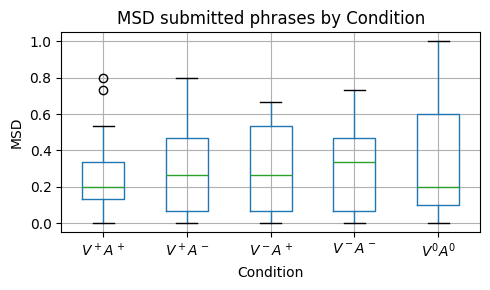

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
ptest.boxplot([1,2,3,4,5], ax=ax0)#[0])
plt.title("MSD submitted phrases by Condition")
ax0.set_xticklabels(['$V^+A^+$', '$V^+A^-$', '$V^-A^+$', '$V^-A^-$', '$V^0A^0$'])
ax0.set_ylabel('MSD')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.show()

In [69]:
statprint(ptest, [1,2,3,4])

C Mean Std
1 0.297 0.25
2 0.323 0.283
3 0.287 0.239
4 0.292 0.25
-----------
ANOVA 0.05, p=0.985
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [70]:
# MSD is not statistically significantly different across any condition

In [71]:
##### Backspace count #####

In [72]:
events.head(2)

id              pid  phrase event data       itype  \
0  288250  id265810f075655     NaN    KP    B  insertText   
1  288251  id265810f075655     NaN    KP    o  insertText   

                        ts  extype  effect        tsunix  
0  2024-10-09 11:26:28.750       5       1  1.728462e+09  
1  2024-10-09 11:26:29.207       5       1  1.728462e+09

In [73]:
events.groupby('itype').count()

id    pid  phrase  event   data     ts  extype  \
itype                                                                      
deleteContentBackward   2668   2668       0   2668      0   2668    2668   
insertText             50467  50467       0  50467  50467  50467   50467   

                       effect  tsunix  
itype                                  
deleteContentBackward    2668    2668  
insertText              50467   50467

In [74]:
etest = events[events['itype']=='deleteContentBackward'][['pid','extype','id']].groupby(['pid', 'extype']).count()
etest.reset_index(inplace=True)
etest.head(5)

pid  extype  id
0  id247ee496e13af       1  28
1  id247ee496e13af       2  41
2  id247ee496e13af       3  14
3  id247ee496e13af       4  22
4  id247ee496e13af       5  34

In [75]:
etest=etest.pivot(index='pid', columns ='extype', values='id')
etest.reset_index(inplace=True)
etest.head(5)

extype              pid   1   2   3   4   5
0       id247ee496e13af  28  41  14  22  34
1       id265810f075655  94  77  44  84  40
2       id2976d2e3934f3  60  50  41  39  30
3       id2b77aaf063e38  43  60  45  58  30
4       id3688c472f8956  24  27  32  35  22

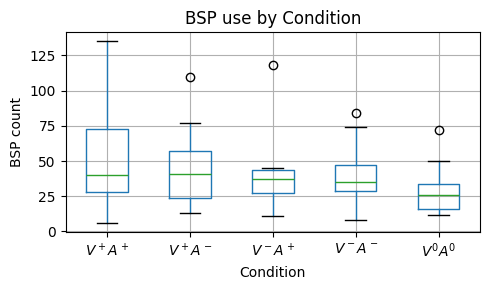

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
etest.boxplot([1,2,3,4,5], ax=ax0)#[0])
plt.title("BSP use by Condition")
ax0.set_xticklabels(['$V^+A^+$', '$V^+A^-$', '$V^-A^+$', '$V^-A^-$', '$V^0A^0$'])

ax0.set_ylabel('BSP count')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.show()

In [78]:
statprint(etest, [1,2,3,4,5])

C Mean Std
1 53.154 36.101
2 44.769 27.429
3 38.923 26.421
4 39.385 22.089
5 29.0 17.185
-----------
FRIEDMAN 10.548, p=0.032
-----------
T-test (1, 2): t=1.191, p=0.257
Wilcoxon (1, 3): Z=-1.434, p=0.152
T-test (1, 4): t=2.072, p=0.06
Wilcoxon (1, 5): Z=-2.831, p=0.005 *
Wilcoxon (2, 3): Z=-1.399, p=0.162
T-test (2, 4): t=0.797, p=0.441
Wilcoxon (2, 5): Z=-2.867, p=0.004 *
Wilcoxon (3, 4): Z=-0.42, p=0.675
Wilcoxon (3, 5): Z=-2.063, p=0.039
Wilcoxon (4, 5): Z=-1.854, p=0.064
bf-adj p: 0.005


In [46]:
# Backspace use is not statistically significantly different across any condition

In [20]:
##### WPM test ######


In [79]:
phrases.head(5)

id              pid  extype  \
0  7626  id265810f075655       5   
1  7627  id265810f075655       5   
2  7628  id265810f075655       5   
3  7629  id265810f075655       5   
4  7630  id265810f075655       5   

                                         orig_phrase  \
0  Bottling plants are not allowed in blacklisted...   
1  A tachometer can produce inaccurate conjecture...   
2  Some medical supplies are often found to be de...   
3  Capitalist systems can lead to overheated econ...   
4   The film's tragic ending made it feel overrated.   

                                          sub_phrase  effect  \
0  Bottling plants are not allowed in blacklisted...       1   
1  A tachometer can produce inaccurate conjecture...       1   
2  Some medical supplies are often found to be de...       1   
3  Capitalist systems can lead to overheated econ...       1   
4   The film's tragic ending made it feel overrated.       1   

                     start                      end       startts  \
0  2024-10-09 11:26:28.750  2024-10-09 11:26:55.386  1.728462e+09   
1  2024-10-09 11:27:05.150  2024-10-09 11:27:40.251  1.728462e+09   
2  2024-10-09 11:27:48.229  2024-10-09 11:28:22.053  1.728462e+09   
3  2024-10-09 11:28:29.922  2024-10-09 11:28:57.989  1.728463e+09   
4  2024-10-09 11:29:06.905  2024-10-09 11:29:34.468  1.728463e+09   

          endts                                         orig_clean  \
0  1.728462e+09  bottling plants are not allowed in blacklisted...   
1  1.728462e+09  a tachometer can produce inaccurate conjecture...   
2  1.728463e+09  some medical supplies are often found to be de...   
3  1.728463e+09  capitalist systems can lead to overheated econ...   
4  1.728463e+09     the films tragic ending made it feel overrated   

                                    sub_phrase_clean  ldist  
0  bottling plants are not allowed in blacklisted...      0  
1  a tachometer can produce inaccurate conjecture...      0  
2  some medical supplies are often found to be de...      0  
3  capitalist systems can lead to overheated econ...      0  
4     the films tragic ending made it feel overrated      0

In [80]:
phrases['diff'] = phrases['endts'] - phrases['startts']

In [81]:
def wpms(xid, string, time):
    try:
        return (len(string) / 5) / (time/60)
    except:
        print(xid, string)

phrases['wpm']=phrases.apply(lambda x: wpms(x.name, x['sub_phrase'], x['diff']), axis=1)
phrases.head(5)

id              pid  extype  \
0  7626  id265810f075655       5   
1  7627  id265810f075655       5   
2  7628  id265810f075655       5   
3  7629  id265810f075655       5   
4  7630  id265810f075655       5   

                                         orig_phrase  \
0  Bottling plants are not allowed in blacklisted...   
1  A tachometer can produce inaccurate conjecture...   
2  Some medical supplies are often found to be de...   
3  Capitalist systems can lead to overheated econ...   
4   The film's tragic ending made it feel overrated.   

                                          sub_phrase  effect  \
0  Bottling plants are not allowed in blacklisted...       1   
1  A tachometer can produce inaccurate conjecture...       1   
2  Some medical supplies are often found to be de...       1   
3  Capitalist systems can lead to overheated econ...       1   
4   The film's tragic ending made it feel overrated.       1   

                     start                      end       startts  \
0  2024-10-09 11:26:28.750  2024-10-09 11:26:55.386  1.728462e+09   
1  2024-10-09 11:27:05.150  2024-10-09 11:27:40.251  1.728462e+09   
2  2024-10-09 11:27:48.229  2024-10-09 11:28:22.053  1.728462e+09   
3  2024-10-09 11:28:29.922  2024-10-09 11:28:57.989  1.728463e+09   
4  2024-10-09 11:29:06.905  2024-10-09 11:29:34.468  1.728463e+09   

          endts                                         orig_clean  \
0  1.728462e+09  bottling plants are not allowed in blacklisted...   
1  1.728462e+09  a tachometer can produce inaccurate conjecture...   
2  1.728463e+09  some medical supplies are often found to be de...   
3  1.728463e+09  capitalist systems can lead to overheated econ...   
4  1.728463e+09     the films tragic ending made it feel overrated   

                                    sub_phrase_clean  ldist    diff        wpm  
0  bottling plants are not allowed in blacklisted...      0  26.636  23.426941  
1  a tachometer can produce inaccurate conjecture...      0  35.101  19.144754  
2  some medical supplies are often found to be de...      0  33.824  18.803217  
3  capitalist systems can lead to overheated econ...      0  28.067  22.232515  
4     the films tragic ending made it feel overrated      0  27.563  20.897580

In [82]:
phrases = phrases[['pid','extype','wpm']].groupby(['pid','extype']).mean()
phrases.reset_index(inplace=True)
phrases.head(5)
#ptest.pivot(index='pid', columns ='extype', values='ldist')

pid  extype        wpm
0  id247ee496e13af       1  26.105068
1  id247ee496e13af       2  24.833152
2  id247ee496e13af       3  23.486803
3  id247ee496e13af       4  25.676772
4  id247ee496e13af       5  22.693007

In [83]:
phrases=phrases.pivot(index='pid', columns ='extype', values='wpm')
phrases.reset_index(inplace=True)
phrases.head(5)

extype              pid          1          2          3          4          5
0       id247ee496e13af  26.105068  24.833152  23.486803  25.676772  22.693007
1       id265810f075655  26.066258  25.548227  23.145376  23.407756  22.061256
2       id2976d2e3934f3  26.150140  27.638424  27.167406  29.813739  25.885854
3       id2b77aaf063e38  23.468047  24.819419  23.517149  22.565422  21.643080
4       id3688c472f8956  21.894960  24.875314  21.562998  21.958453  20.884074

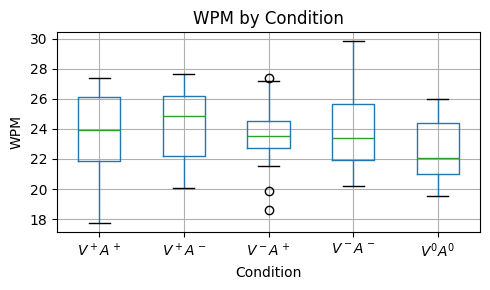

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
phrases.boxplot([1,2,3,4,5], ax=ax0)#[0])
plt.title("WPM by Condition")
ax0.set_xticklabels(['$V^+A^+$', '$V^+A^-$', '$V^-A^+$', '$V^-A^-$', '$V^0A^0$'])

ax0.set_ylabel('WPM')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.show()

In [86]:
statprint(phrases, [1,2,3,4,5])

C Mean Std
1 23.563 2.945
2 24.384 2.564
3 23.6 2.616
4 23.814 2.876
5 22.591 2.153
-----------
ANOVA 0.78, p=0.543
-----------


In [48]:
#1-5 = Mental, Physical, Performance, Effort, Frustration
#6, 7 = VA video AS
#8, 9 = VA typing AS
questionnaires = pd.read_csv('questionnaires.csv')
questionnaires.head(5)


id     diff              pid  extype  q1  q2  q3  q4  q5  q6  q7  q8  q9
0  498  120.822  id265810f075655       5  10  10   0  14  12  32  35  44  28
1  499   92.413  id265810f075655       3  13  14   0  15  13  64  54  19  70
2  500   50.455  id265810f075655       4  10  15   1  15  16  50  60  28  37
3  501   87.564  id265810f075655       5   7  12   1  13  10  50  36  57  50
4  502   42.803  id265810f075655       2   8  14   0  14  10  62  50  73  40

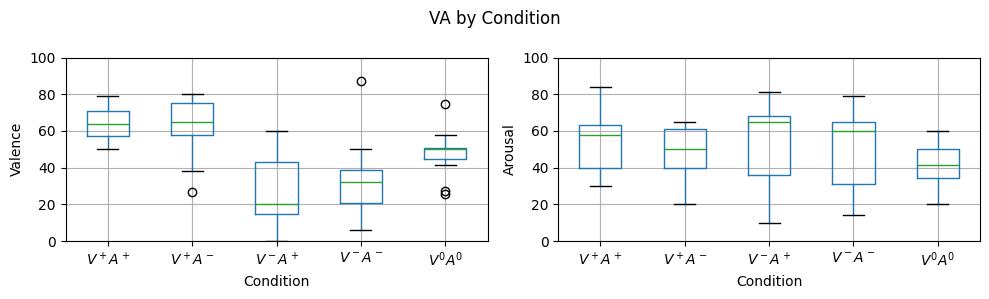

====valence====
C Mean Std
1 63.077 9.242
2 62.154 17.535
3 25.462 20.052
4 33.615 20.321
5 47.846 12.319
-----------
FRIEDMAN 26.682, p=0.0
-----------
T-test (1, 2): t=0.179, p=0.861
T-test (1, 3): t=5.969, p=0.0 *
Wilcoxon (1, 4): Z=-2.982, p=0.003 *
T-test (1, 5): t=4.137, p=0.001 *
T-test (2, 3): t=5.312, p=0.0 *
Wilcoxon (2, 4): Z=-2.831, p=0.005 *
T-test (2, 5): t=3.238, p=0.007
Wilcoxon (3, 4): Z=-0.839, p=0.402
T-test (3, 5): t=-4.533, p=0.001 *
Wilcoxon (4, 5): Z=-1.887, p=0.059
bf-adj p: 0.005
====arousal====
C Mean Std
1 54.846 16.861
2 47.769 13.615
3 55.154 22.531
4 50.231 20.584
5 42.385 11.843
-----------
ANOVA 1.192, p=0.324
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [148]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes[0]
q8 =  questionnaires[['pid','q8','extype']].groupby(['pid','extype']).mean()
q8.reset_index(inplace=True)
q8=q8.pivot(index='pid', columns ='extype', values='q8')
q8.reset_index(inplace=True)
q8.boxplot([1,2,3,4,5], ax=ax0)#[0])

ax1=axes[1]
q9 =  questionnaires[['pid','q9','extype']].groupby(['pid','extype']).mean()
q9.reset_index(inplace=True)
q9=q9.pivot(index='pid', columns ='extype', values='q9')
q9.reset_index(inplace=True)
q9.boxplot([1,2,3,4,5], ax=ax1)#[0])

fig.suptitle("VA by Condition")
ax0.set_xticklabels(['$V^+A^+$', '$V^+A^-$', '$V^-A^+$', '$V^-A^-$', '$V^0A^0$'])
ax0.set_ylabel('Valence')
ax0.set_xlabel('Condition')

ax1.set_xticklabels(['$V^+A^+$', '$V^+A^-$', '$V^-A^+$', '$V^-A^-$', '$V^0A^0$'])
ax1.set_ylabel('Arousal')
ax1.set_xlabel('Condition')

ax0.set_ylim(0,100)
ax1.set_ylim(0,100)

plt.tight_layout()
plt.show()

print('====valence====')
statprint(q8, [1,2,3,4,5])
print('====arousal====')
statprint(q9, [1,2,3,4,5])

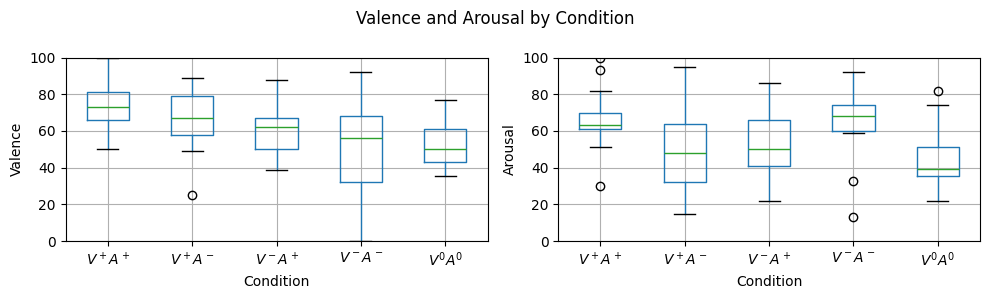

====valence====
C Mean Std
1 63.077 9.242
2 62.154 17.535
3 25.462 20.052
4 33.615 20.321
5 47.846 12.319
-----------
FRIEDMAN 26.682, p=0.0
-----------
T-test (1, 2): t=0.179, p=0.861
T-test (1, 3): t=5.969, p=0.0 *
Wilcoxon (1, 4): Z=-2.982, p=0.003 *
T-test (1, 5): t=4.137, p=0.001 *
T-test (2, 3): t=5.312, p=0.0 *
Wilcoxon (2, 4): Z=-2.831, p=0.005 *
T-test (2, 5): t=3.238, p=0.007
Wilcoxon (3, 4): Z=-0.839, p=0.402
T-test (3, 5): t=-4.533, p=0.001 *
Wilcoxon (4, 5): Z=-1.887, p=0.059
bf-adj p: 0.005
====arousal====
C Mean Std
1 54.846 16.861
2 47.769 13.615
3 55.154 22.531
4 50.231 20.584
5 42.385 11.843
-----------
ANOVA 1.192, p=0.324
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes[0]
q6 =  questionnaires[['pid','q6','extype']].groupby(['pid','extype']).mean()
q6.reset_index(inplace=True)
q6=q6.pivot(index='pid', columns ='extype', values='q6')
q6.reset_index(inplace=True)
q6.boxplot([1,2,3,4,5], ax=ax0)#[0])

ax1=axes[1]
q7 =  questionnaires[['pid','q7','extype']].groupby(['pid','extype']).mean()
q7.reset_index(inplace=True)
q7=q7.pivot(index='pid', columns ='extype', values='q7')
q7.reset_index(inplace=True)
q7.boxplot([1,2,3,4,5], ax=ax1)#[0])

fig.suptitle("Valence and Arousal by Condition")
ax0.set_xticklabels(['$V^+A^+$', '$V^+A^-$', '$V^-A^+$', '$V^-A^-$', '$V^0A^0$'])
ax0.set_ylabel('Valence')
ax0.set_xlabel('Condition')

ax1.set_xticklabels(['$V^+A^+$', '$V^+A^-$', '$V^-A^+$', '$V^-A^-$', '$V^0A^0$'])
ax1.set_ylabel('Arousal')
ax1.set_xlabel('Condition')

ax0.set_ylim(0,100)
ax1.set_ylim(0,100)


plt.tight_layout()
plt.show()

print('====valence====')
statprint(q8, [1,2,3,4,5])
print('====arousal====')
statprint(q9, [1,2,3,4,5])

====q1====
C Mean Std
1 11.308 4.644
2 10.462 4.858
3 10.846 4.432
4 11.538 4.943
5 7.885 4.678
-----------
ANOVA 1.265, p=0.294
-----------
====q2====
C Mean Std
1 11.846 3.934
2 10.769 5.231
3 10.846 5.014
4 11.308 4.442
5 8.423 4.681
-----------
ANOVA 1.019, p=0.405
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)
/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


====q3====
C Mean Std
1 3.077 2.397
2 4.846 4.652
3 4.615 4.482
4 4.231 4.246
5 4.808 3.945
-----------
ANOVA 0.432, p=0.785
-----------
====q4====
C Mean Std
1 12.077 4.681
2 10.385 4.073
3 11.769 4.622
4 12.231 4.126
5 8.269 4.489
-----------
FRIEDMAN 26.335, p=0.0
-----------
T-test (1, 2): t=2.412, p=0.033
Wilcoxon (1, 3): Z=-1.65, p=0.099
T-test (1, 4): t=-0.196, p=0.848
T-test (1, 5): t=3.768, p=0.003 *
Wilcoxon (2, 3): Z=-2.04, p=0.041
T-test (2, 4): t=-2.182, p=0.05
T-test (2, 5): t=2.479, p=0.029
Wilcoxon (3, 4): Z=-1.36, p=0.174
Wilcoxon (3, 5): Z=-3.113, p=0.002 *
T-test (4, 5): t=5.375, p=0.0 *
bf-adj p: 0.005
====q5====
C Mean Std
1 10.154 5.829
2 9.923 4.856
3 8.923 5.678
4 8.692 5.75
5 7.808 3.276
-----------
ANOVA 0.445, p=0.776
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)
/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)
/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


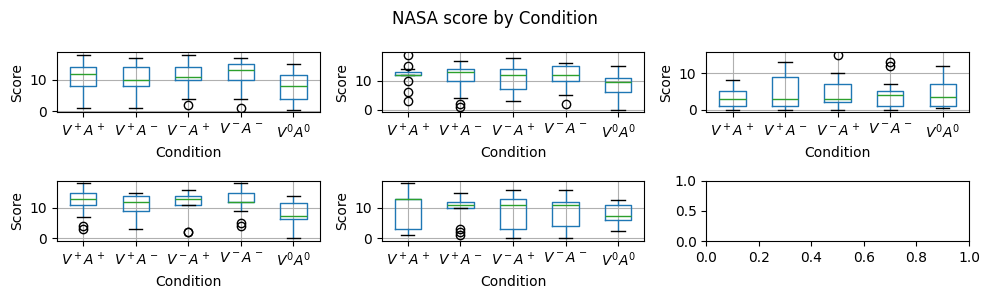

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
counter = 0
for i in range(2):
    for j in range(3):
        counter+=1
        if counter==6:
            break
        ax = axes[i][j]
        
        qdf = questionnaires[['pid','q'+str(counter),'extype']].groupby(['pid','extype']).mean()
        qdf.reset_index(inplace=True)

        qdf=qdf.pivot(index='pid', columns ='extype', values='q'+str(counter))
        qdf.reset_index(inplace=True)
        qdf.boxplot([1,2,3,4,5], ax=ax)

        ax.set_xticklabels(['$V^+A^+$', '$V^+A^-$', '$V^-A^+$', '$V^-A^-$', '$V^0A^0$'])
        ax.set_ylabel('Score')
        ax.set_xlabel('Condition')

        print('===='+'q'+str(counter)+'====')

        statprint(qdf, [1,2,3,4,5])


fig.suptitle("NASA score by Condition")

plt.tight_layout()
plt.show()
